# Practical 7 - Part 1B
The aim of part 1B is to use the homography routine
that you established in the first part of the practical.  We are going to
make a panorama of several images that are related by a homography.  We
provide 3 images (one of which is has a large surrounding region) and a
matching set of points between these images.

# Import libraries 

In [1]:
%matplotlib inline
import os 
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

# Load and plot the images 

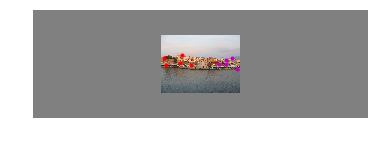

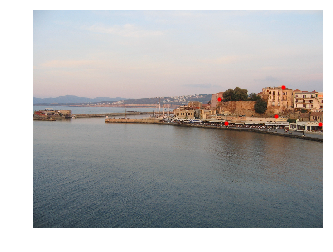

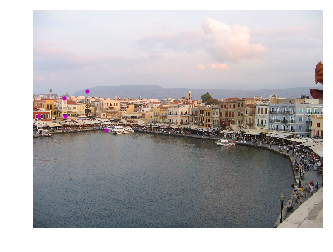

In [2]:
# Load data
data = sio.loadmat('PracticalData.mat', squeeze_me = True);
# Unpack data
# im1 is center image with grey background
im1 = data['im1']
# im2 is left image 
im2 = data['im2']
# pts1 and pts2 are matching points between image1 and image2
pts1 = data['pts1']
pts2 = data['pts2']
# im3 is right image
im3 = data['im3']
# pts1b and pts3 are matching points between image 1 and image 3
pts1b = data['pts1b']
pts3 = data['pts3']

# Show images and points 
plt.imshow(im1)
plt.plot(pts1[0,:],pts1[1,:],'r.')
plt.plot(pts1b[0,:],pts1b[1,:],'m.')
plt.axis('off')
plt.show()

plt.imshow(im2)
plt.plot(pts2[0,:],pts2[1,:],'r.')
plt.axis('off')
plt.show()

plt.imshow(im3)
plt.plot(pts3[0,:],pts3[1,:],'m.')
plt.axis('off')
plt.show()

In [3]:
im2.shape

(480, 640, 3)

In [4]:
pts1.shape

(2, 5)

In [5]:
pts1

array([[ 1290.5   ,  1066.8351,  1083.589 ,  1214.2696,  1199.1911],
       [  448.877 ,   393.589 ,   451.3901,   368.4581,   428.7723]])

In [6]:
pts2

array([[ 632.5419,  408.877 ,  423.9555,  550.4476,  535.3691],
       [ 251.3901,  195.2644,  248.877 ,  167.6204,  232.123 ]])

In [7]:
pts3

array([[  10.1335,  119.034 ,  159.2435,   66.2592,   68.7723],
       [ 232.9607,  178.5105,  263.9555,  192.7513,  232.9607]])

# **** TO DO **** Now use the functions you completed in part 1A (solveAXEqualsZero, calcBestHomography) to make a panoramic image. 

In [8]:
def solveAXEqualsZero(A):
    # TO DO: Write this routine - it should solve Ah = 0   
    u,s,v = np.linalg.svd(A)
    v_last = v[-1,:]
    return v_last

In [10]:
# This function should apply the direct linear transform (DLT) algorithm to calculate the best 
# homography that maps the points in pts1Cart to their corresonding matching in pts2Cart
def calcBestHomography(pts1Cart, pts2Cart):    
 
    # First convert points into homogeneous representation
    pts1Hom = np.concatenate((pts1Cart, np.ones((1,pts1Cart.shape[1]))), axis=0)
    pts2Hom = np.concatenate((pts2Cart, np.ones((1,pts2Cart.shape[1]))), axis=0)
    
    # Then construct the matrix A, size (n_points,9)
    
    num_examples = 10
    A = np.zeros((num_examples,9))
    
    for i in range(5):
        uv = pts1Hom[:, i]
        xy = pts2Hom[:, i]
        A[2 * i,     :] = np.hstack([[0, 0, 0], -uv.T, uv.T * xy[1]])
        A[2 * i + 1, :] = np.hstack([uv.T, [0, 0, 0], -uv.T * xy[0]])
    
    # Solve Ah = 0
    h = solveAXEqualsZero(A)
    
    # Reshape h into the matrix H, values of h go first into rows of H
    H = np.reshape(h, (3, 3))
    
    return H

In [58]:
# TO DO: Calculate homography from pts1 to pts2 
HEst = calcBestHomography(pts1, pts2)
print(HEst)

# TO DO: 
# For every pixel in image 1:
    # Transform this pixel position with your homography to find where it is in the coordinates of image 2
    # If it the transformed position is within the boundary of image 2: 
    #     Copy pixel colour from image 2 pixel to current position in image 1 
    #     Draw new image1

row_im1 = im1.shape[0]
print(row_im1)
col_im1 = im1.shape[1]
print(col_im1)
    
row_im2 = im2.shape[0] 
print(row_im2)
col_im2 = im2.shape[1]
print(col_im2)

[[ -1.70076421e-03  -3.22154377e-04   9.71171156e-01]
 [  2.24426443e-04  -2.39213409e-03   2.38341747e-01]
 [  1.10576180e-06  -6.03070289e-07  -3.32090685e-03]]
880
2740
480
640


In [11]:
# TO DO: Calculate homography from pts1 to pts2 
pts1_round = np.around(pts1)
pts2_round = np.around(pts2)

#HEst = calcBestHomography(pts1_round, pts2_round)
HEst = calcBestHomography(pts1, pts2)

# TO DO: 
# For every pixel in image 1:
    # Transform this pixel position with your homography to find where it is in the coordinates of image 2
    # If it the transformed position is within the boundary of image 2: 
    #     Copy pixel colour from image 2 pixel to current position in image 1 
    #     Draw new image1

row_im1 = im1.shape[0] 
col_im1 = im1.shape[1]
    
row_im2 = im2.shape[0] 
col_im2 = im2.shape[1]

for x in range(1,row_im1+1):
    
    for y in range(1,col_im1+1):
        
        pts1Cart = np.array([[y],
                             [x]])
        
        #print(pts1Cart)
        
        # First convert points into homogeneous representation
        pts1Hom = np.concatenate((pts1Cart, np.ones((1,pts1Cart.shape[1]))), axis=0)
        #print("pst1Hom {}".format(pts1Hom))
        
        # Apply estimated homography to each pixel
        pts2EstHom = np.matmul(HEst,pts1Hom)
        #print("pst2EstHom {}".format(pts2EstHom))

        # Convert back to Cartesian coordinates
        pts2EstCart = pts2EstHom[0:2,:] / np.tile([pts2EstHom[2,:]],(2,1))
        #print("pst2EstCart {}".format(pts2EstCart))
        
        #break
        
        if (int(np.round(pts2EstCart[1,0])) in range(1,row_im2+1)) and (int(np.round(pts2EstCart[0,0])) in range(1,col_im2+1)):
            #Copy pixel from image 2 to position in img1
            i = int(np.round(pts2EstCart[1,0]))
            j = int(np.round(pts2EstCart[0,0]))
            im1[x-1,y-1,:] = im2[i-1,j-1,:]
    

In [12]:
# TO DO: Repeat the above process mapping image 3 to image 1.

# TO DO: Calculate homography from pts1 to pts2 
HEst_b = calcBestHomography(pts1b, pts3)

# TO DO: 
# For every pixel in image 1:
    # Transform this pixel position with your homography to find where it is in the coordinates of image 2
    # If it the transformed position is within the boundary of image 2: 
    #     Copy pixel colour from image 2 pixel to current position in image 1 
    #     Draw new image1

    
row_im3 = im3.shape[0] 
col_im3 = im3.shape[1]

for x in range(1,row_im1+1):
    for y in range(1,col_im1+1):
        
        pts1Cart = np.array([[y],
                             [x]])
        
        #print("pts1Cart {}".format(pts1Cart))
        # First convert points into homogeneous representation
        pts1Hom = np.concatenate((pts1Cart, np.ones((1,pts1Cart.shape[1]))), axis=0)
        #print("pst1Hom {}".format(pts1Hom))
        
        # Apply estimated homography to each pixel
        pts2EstHom = np.matmul(HEst_b,pts1Hom)
        #print("pst2EstHom {}".format(pts2EstHom))
        
        # Convert back to Cartesian coordinates
        pts2EstCart = pts2EstHom[0:2,:] / np.tile([pts2EstHom[2,:]],(2,1))
        #print("pst2EstCart {}".format(pts2EstCart))
        
        if (int(np.round(pts2EstCart[1,0])) in range(1,row_im3+1)) and (int(np.round(pts2EstCart[0,0])) in range(1,col_im3+1)):
            #Copy pixel from image 2 to position in img1
            i = int(np.round(pts2EstCart[1,0]))
            j = int(np.round(pts2EstCart[0,0]))
            im1[x-1,y-1,:] = im3[i-1,j-1,:]
            #print('true')

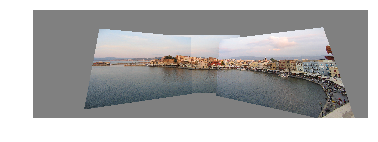

In [13]:
# Plot the final panorama
plt.imshow(im1)
plt.axis('off')
plt.show()